# **TESS CNN Model**

In [ ]:
!jupyter nbconvert --to html /content/TESS_CNN.ipynb

[NbConvertApp] Converting notebook /content/TESS_CNN.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 26 image(s).
[NbConvertApp] Writing 3533679 bytes to /content/TESS_CNN.html


#  <center> Importing <center>

In [ ]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Activation
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Install the latest version of TensorFlow
!pip install -q tensorflow

#  <center> Datasets <center>

In [ ]:
  import os
  from google.colab import files

  # Upload your kaggle.json file (from https://www.kaggle.com/docs/api)
  uploaded = files.upload()

  # Create the Kaggle directory
  os.makedirs('/root/.kaggle', exist_ok=True)

  # Move the uploaded kaggle.json file to the .kaggle folder
  os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

  # Set permissions for the file
  os.chmod('/root/.kaggle/kaggle.json', 600)


Saving kaggle.json to kaggle.json


In [ ]:


# Download the Toronto Emotional Speech Set (TESS) dataset
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess




Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)


In [ ]:
import zipfile

with zipfile.ZipFile('toronto-emotional-speech-set-tess.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/tess')

In [ ]:
# Paths for data in Colab

Tess = "/content/tess/TESS Toronto emotional speech set data/"


In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        if file.endswith('.wav'):
            emotion_part = file.split('_')[-1].replace('.wav', '')  # Get the last segment
        else:
            emotion_part = 'Unknown'  # If not a .wav file

            # Map the emotion
        if emotion_part == "ps":
            file_emotion.append('surprise')
        elif emotion_part == "sad":
            file_emotion.append('sad')
        elif emotion_part == "angry":
            file_emotion.append('angry')
        elif emotion_part == "disgust":
            file_emotion.append('disgust')
        elif emotion_part == "fear":
            file_emotion.append('fear')
        elif emotion_part == "happy":
            file_emotion.append('happy')
        elif emotion_part == "neutral":
            file_emotion.append('neutral')
        else:
            file_emotion.append('Unknown')
        #else:
        #    file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,surprise,/content/tess/TESS Toronto emotional speech se...
1,surprise,/content/tess/TESS Toronto emotional speech se...
2,surprise,/content/tess/TESS Toronto emotional speech se...
3,surprise,/content/tess/TESS Toronto emotional speech se...
4,surprise,/content/tess/TESS Toronto emotional speech se...


In [ ]:
# creating Dataframe using all the 2 dataframes we created so far.
data_path = pd.concat([Tess_df], axis = 0)

data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,surprise,/content/tess/TESS Toronto emotional speech se...
1,surprise,/content/tess/TESS Toronto emotional speech se...
2,surprise,/content/tess/TESS Toronto emotional speech se...
3,surprise,/content/tess/TESS Toronto emotional speech se...
4,surprise,/content/tess/TESS Toronto emotional speech se...


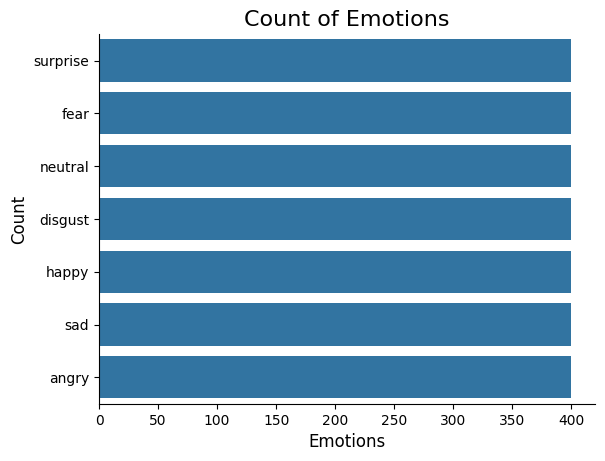

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

#  <center> Waveplot - loudness <center>
#  <center> Spectogram - frequency <center>

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

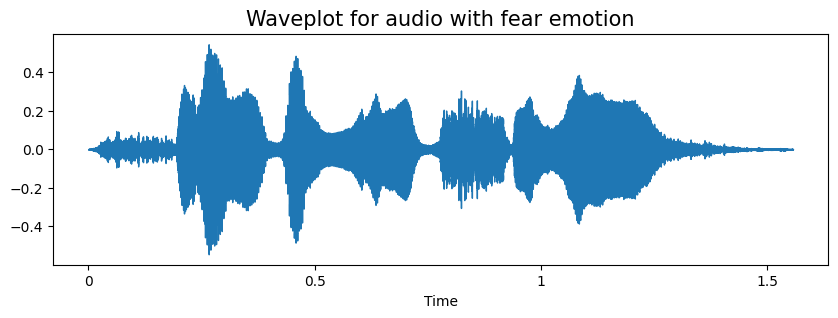

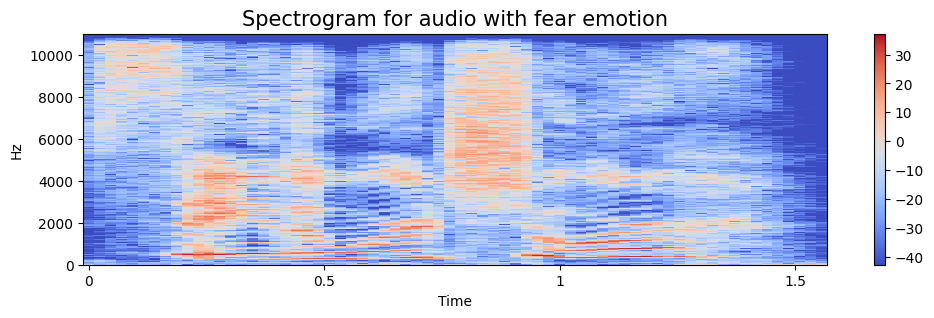

In [ ]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

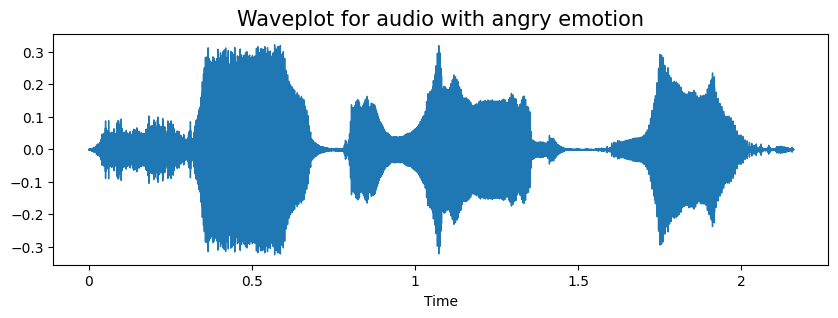

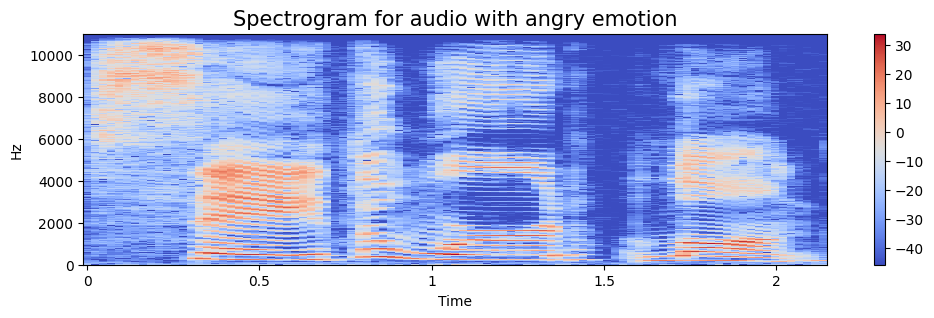

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

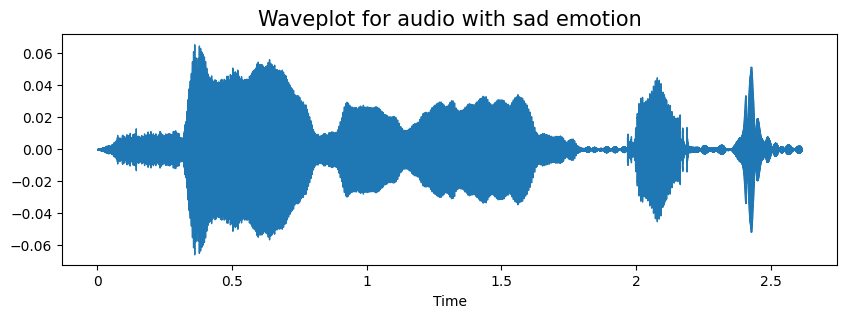

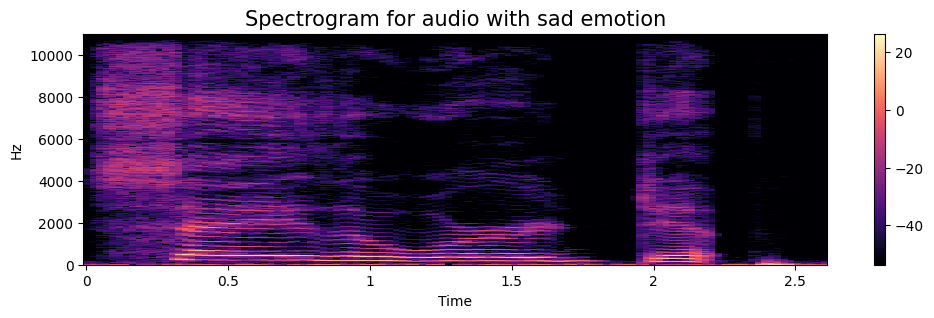

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

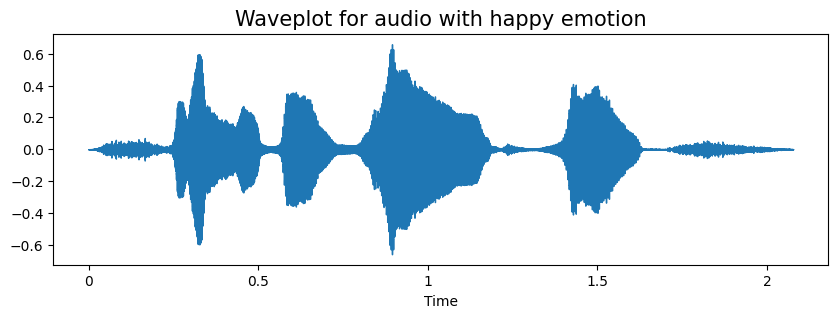

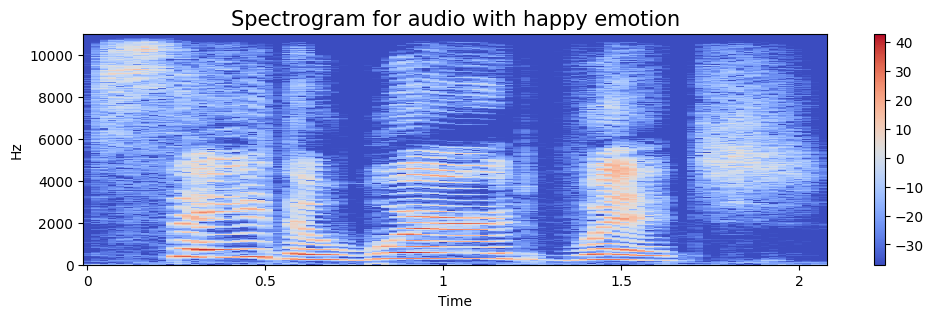

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#  <center> Data Augmentation <center>

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)  # Use keyword argument for sr

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

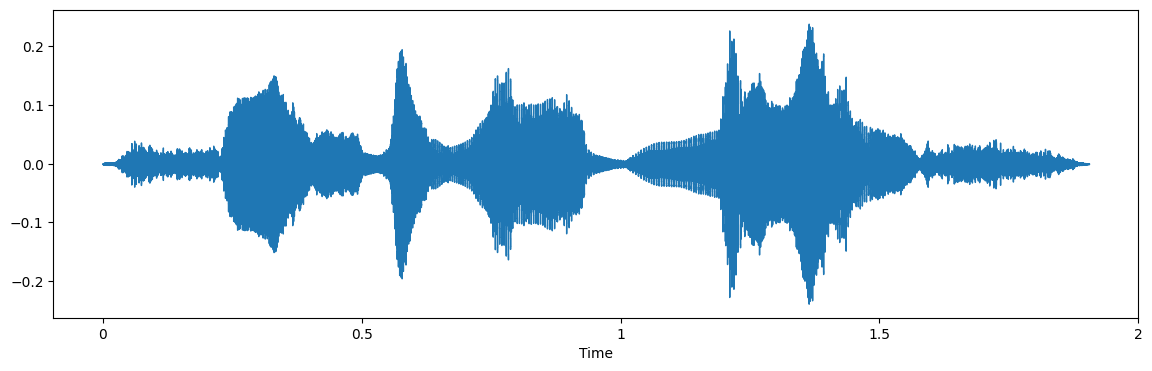

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

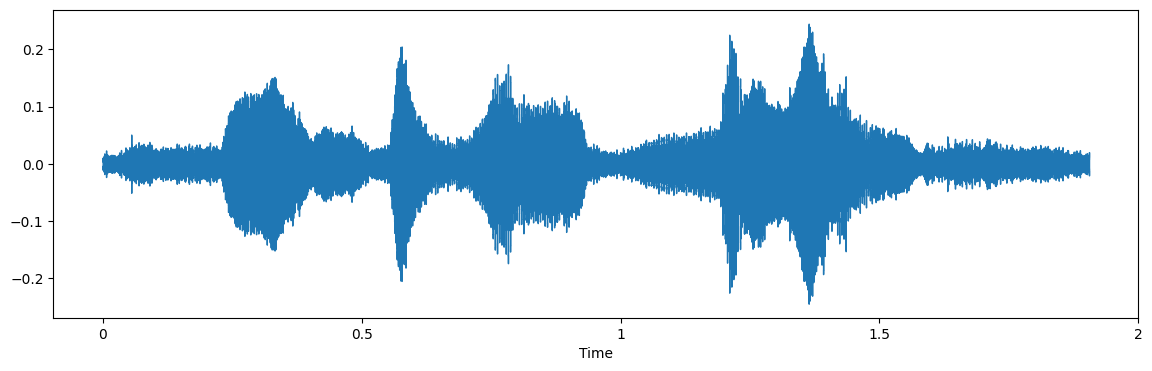

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

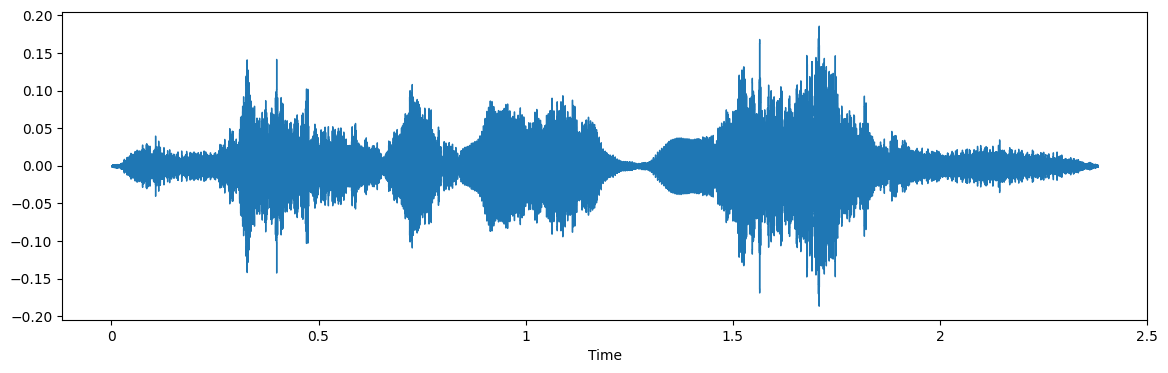

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

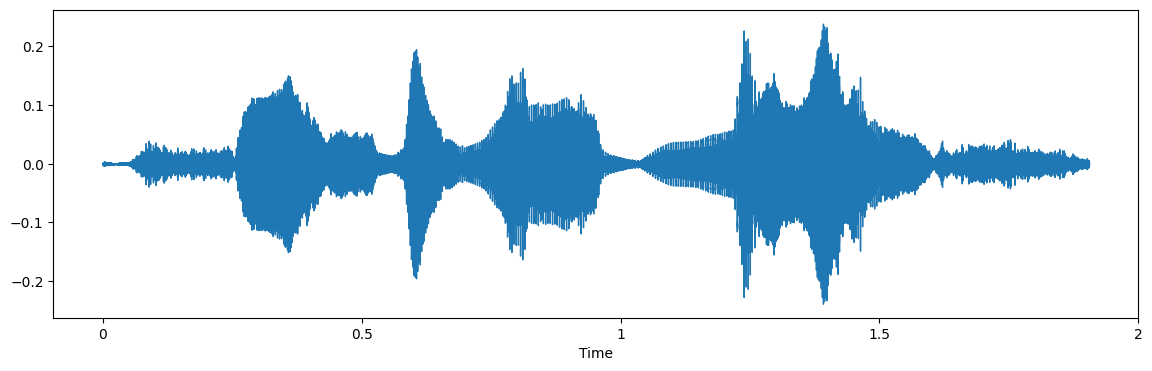

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

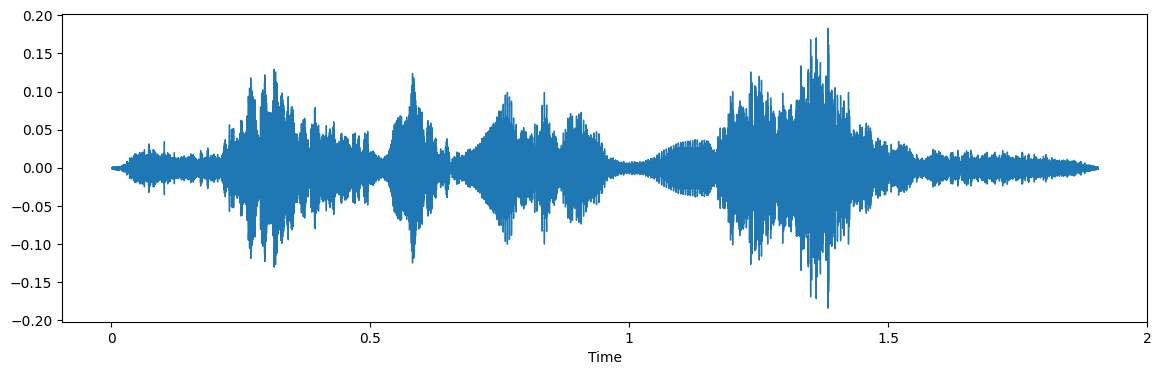

In [ ]:
x = pitch(data, sample_rate, 0.7)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#  <center> Feature Extraction <center>

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

# CNN Dump till before Model

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()


X1 = Features.iloc[: ,:-1].values
Y1 = Features['labels'].values


# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y1 = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


# splitting data
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6300, 162, 1), (6300, 7), (2100, 162, 1), (2100, 7))

# CNN Base Model

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=Y1.shape[1], activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()


rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,255 (2.13 MB)

 Trainable params: 557,255 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.3561 - loss: 1.6433 - val_accuracy: 0.7805 - val_loss: 0.6820 - learning_rate: 0.0010
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7563 - loss: 0.7008 - val_accuracy: 0.8581 - val_loss: 0.3774 - learning_rate: 0.0010
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8517 - loss: 0.4416 - val_accuracy: 0.9200 - val_loss: 0.2325 - learning_rate: 0.0010
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9013 - loss: 0.3114 - val_accuracy: 0.9338 - val_loss: 0.2248 - learning_rate: 0.0010
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9208 - loss: 0.2490 - val_accuracy: 0.9476 - val_loss: 0.1546 - learning_rate: 0.0010
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9326 - loss: 0.2085 - val_accuracy: 0.9157 - val_loss: 0.2415 - learning_rate: 0.0010
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9457 - loss: 0.1785 - val_accurac

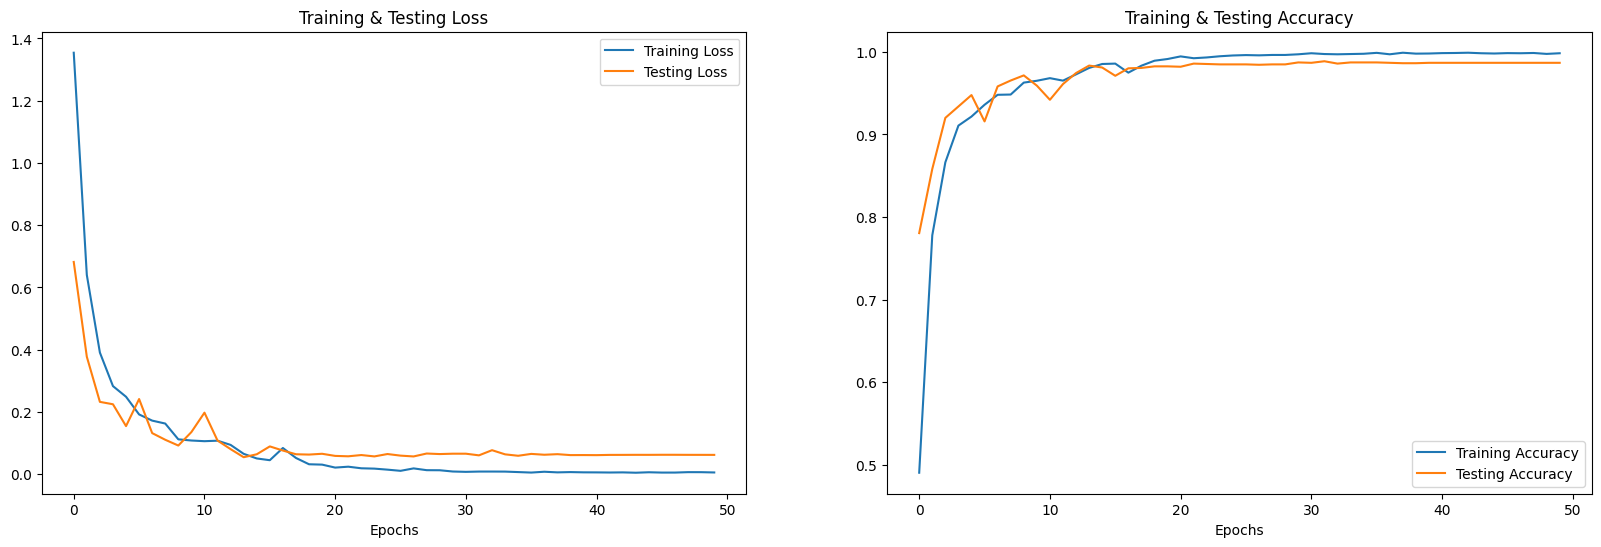

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


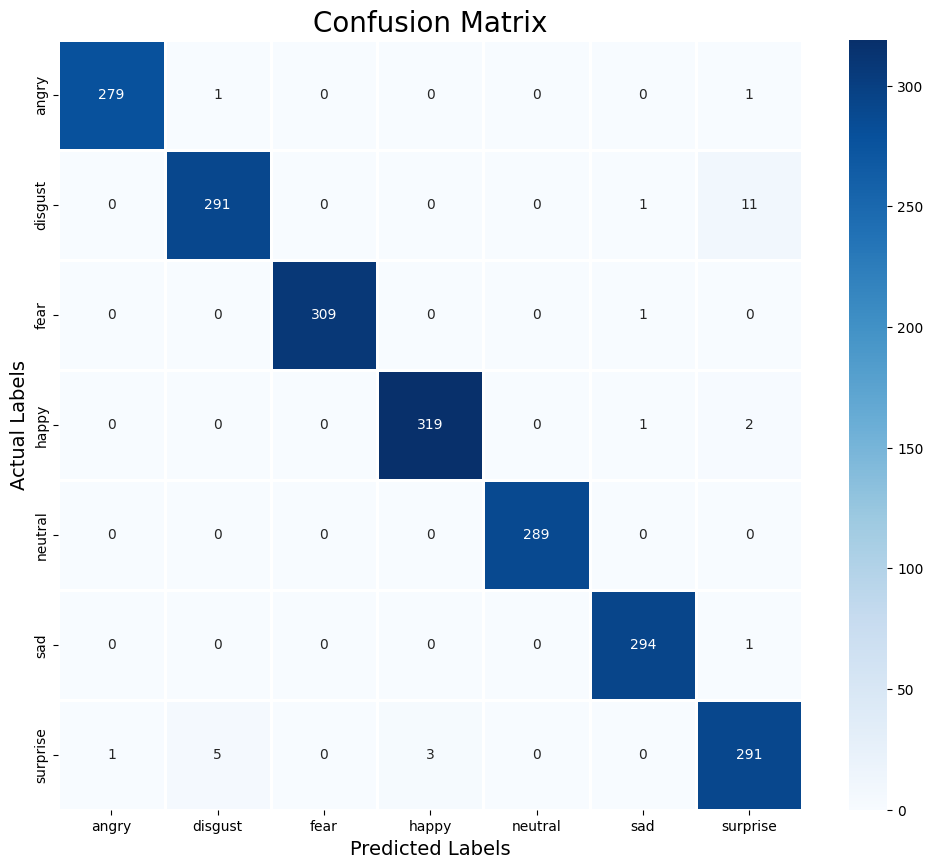

              precision    recall  f1-score   support

       angry       1.00      0.99      0.99       281
     disgust       0.98      0.96      0.97       303
        fear       1.00      1.00      1.00       310
       happy       0.99      0.99      0.99       322
     neutral       1.00      1.00      1.00       289
         sad       0.99      1.00      0.99       295
    surprise       0.95      0.97      0.96       300

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()



# predicting on test data.
pred_test1 = model.predict(x_test)
y_pred1 = encoder.inverse_transform(pred_test1)

y_test1 = encoder.inverse_transform(y_test)



df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred1.flatten()
df['Actual Labels'] = y_test1.flatten()
df.head(10)


cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()



print(classification_report(y_test1, y_pred1))

BatchNormalization

In [ ]:
from keras.layers import BatchNormalization

model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units=Y1.shape[1], activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()


rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 162, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 81, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 41, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 560,199 (2.14 MB)

 Trainable params: 558,727 (2.13 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.4973 - loss: 1.4257 - val_accuracy: 0.3262 - val_loss: 1.7936 - learning_rate: 0.0010
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8775 - loss: 0.4868 - val_accuracy: 0.2410 - val_loss: 1.7354 - learning_rate: 0.0010
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9267 - loss: 0.3024 - val_accuracy: 0.4262 - val_loss: 1.5073 - learning_rate: 0.0010
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9469 - loss: 0.2170 - val_accuracy: 0.7400 - val_loss: 0.7401 - learning_rate: 0.0010
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9536 - loss: 0.1763 - val_accuracy: 0.9495 - val_loss: 0.2287 - learning_rate: 0.0010
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9698 - loss: 0.1353 - val_accuracy: 0.9605 - val_loss: 0.1340 - learning_rate: 0.0010
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9708 - loss: 0.1141 - val_accurac

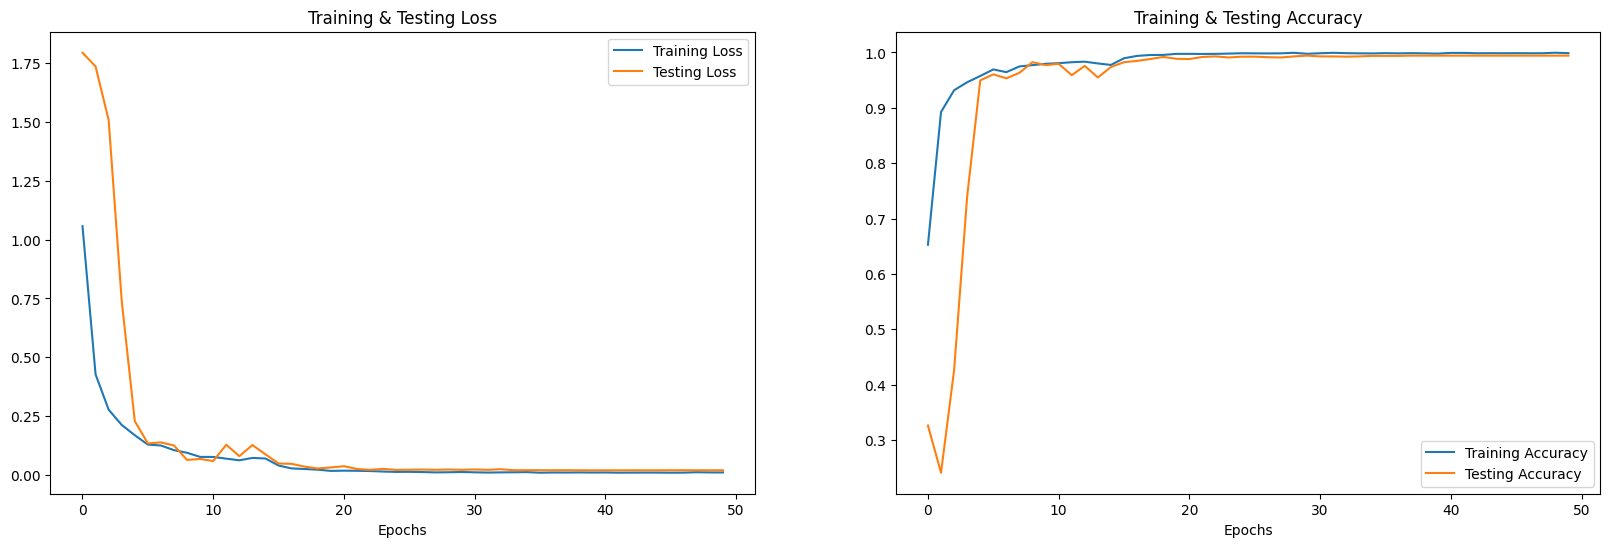

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


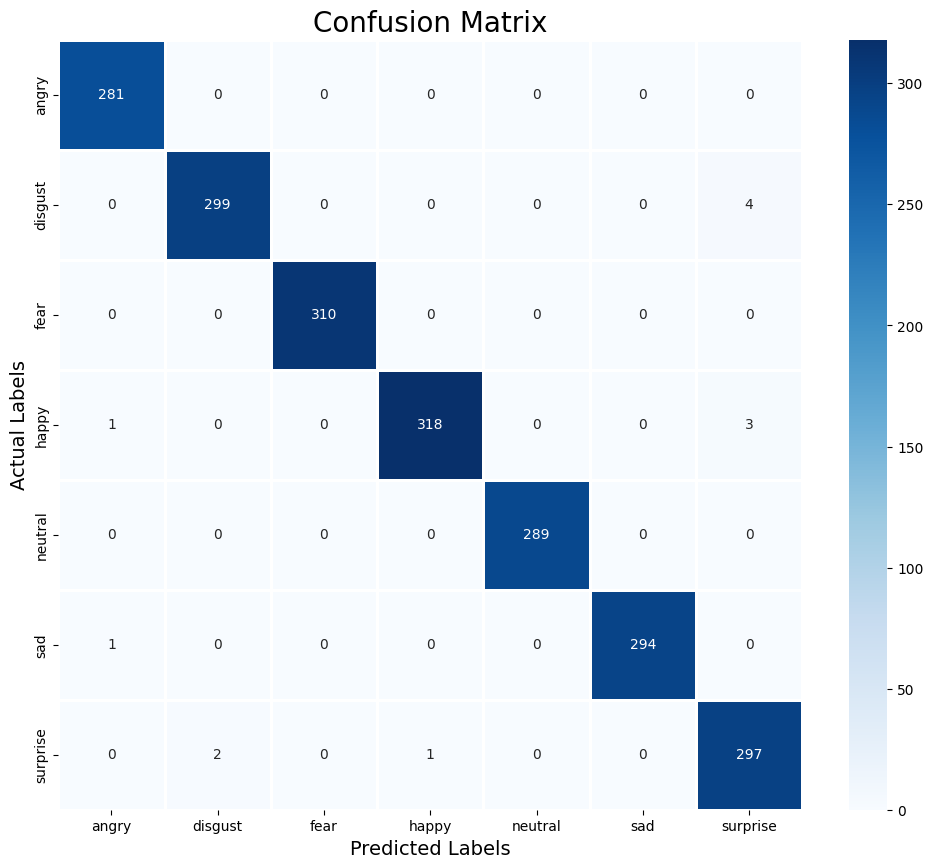

              precision    recall  f1-score   support

       angry       0.99      1.00      1.00       281
     disgust       0.99      0.99      0.99       303
        fear       1.00      1.00      1.00       310
       happy       1.00      0.99      0.99       322
     neutral       1.00      1.00      1.00       289
         sad       1.00      1.00      1.00       295
    surprise       0.98      0.99      0.98       300

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()



# predicting on test data.
pred_test1 = model.predict(x_test)
y_pred1 = encoder.inverse_transform(pred_test1)

y_test1 = encoder.inverse_transform(y_test)



df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred1.flatten()
df['Actual Labels'] = y_test1.flatten()
df.head(10)


cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()



print(classification_report(y_test1, y_pred1))

BatchNormalization, Strided Convolution instead of MaxPooling

In [ ]:
model = Sequential()

# Strided Conv instead of MaxPooling
model.add(Conv1D(256, kernel_size=5, strides=2, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())

model.add(Conv1D(256, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units=Y1.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Training
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=1e-7)
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

# Evaluation
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 81, 256)        │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 81, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 41, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 41, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 21, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 21, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 11, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 11, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 560,199 (2.14 MB)

 Trainable params: 558,727 (2.13 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.7380 - loss: 0.8456 - val_accuracy: 0.4010 - val_loss: 1.7059 - learning_rate: 0.0010
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9730 - loss: 0.1632 - val_accuracy: 0.5471 - val_loss: 1.2225 - learning_rate: 0.0010
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9834 - loss: 0.0983 - val_accuracy: 0.7867 - val_loss: 0.7762 - learning_rate: 0.0010
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9908 - loss: 0.0602 - val_accuracy: 0.9733 - val_loss: 0.2224 - learning_rate: 0.0010
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9904 - loss: 0.0512 - val_accuracy: 0.9857 - val_loss: 0.0660 - learning_rate: 0.0010
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9946 - loss: 0.0394 - val_accuracy: 0.9962 - val_loss: 0.0229 - learning_rate: 0.0010
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9955 - loss: 0.0289 - val_accuracy

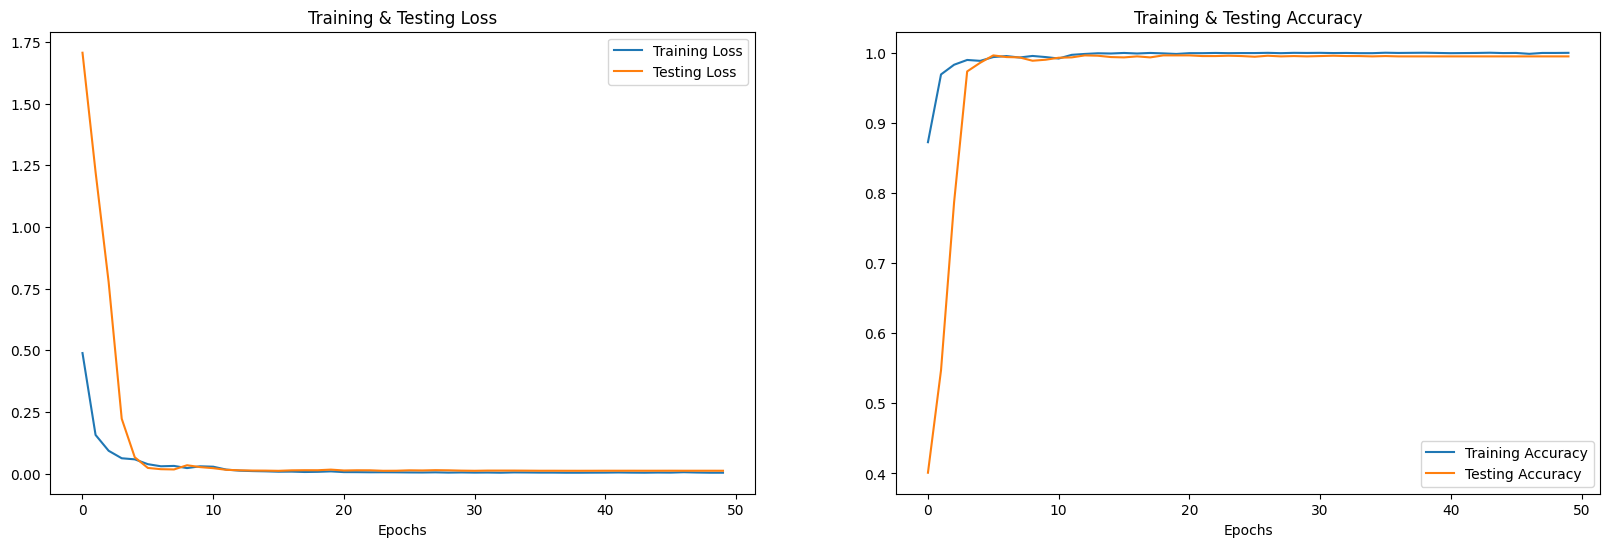

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


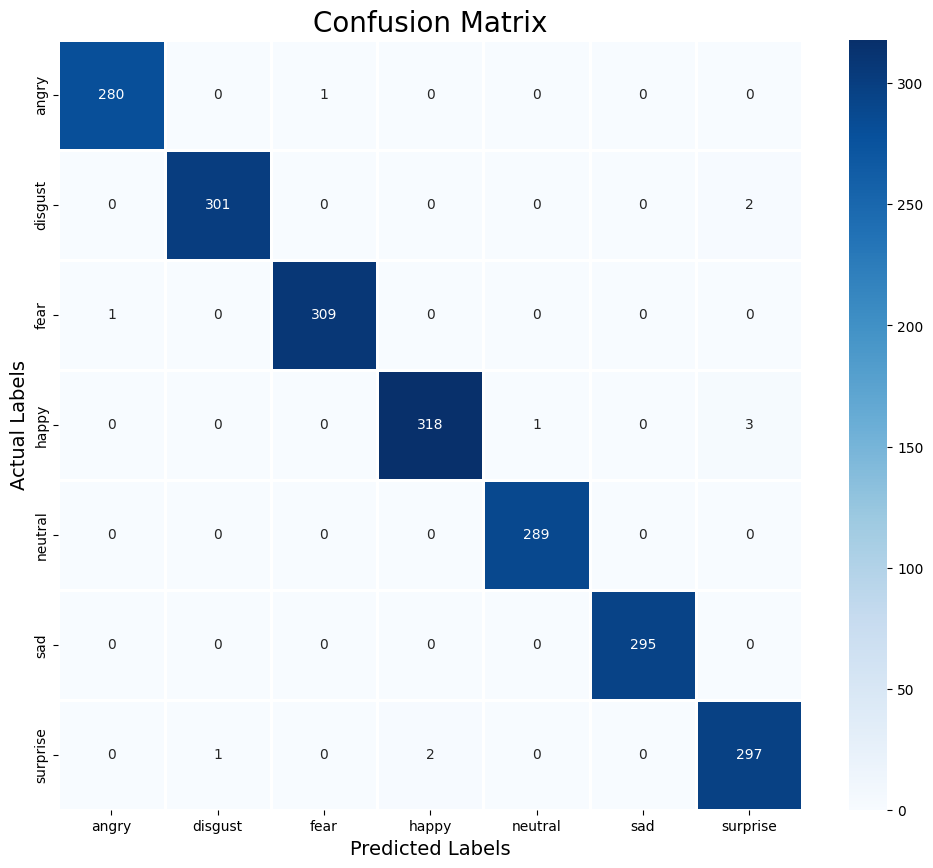

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       281
     disgust       1.00      0.99      1.00       303
        fear       1.00      1.00      1.00       310
       happy       0.99      0.99      0.99       322
     neutral       1.00      1.00      1.00       289
         sad       1.00      1.00      1.00       295
    surprise       0.98      0.99      0.99       300

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()



# predicting on test data.
pred_test1 = model.predict(x_test)
y_pred1 = encoder.inverse_transform(pred_test1)

y_test1 = encoder.inverse_transform(y_test)



df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred1.flatten()
df['Actual Labels'] = y_test1.flatten()
df.head(10)


cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()



print(classification_report(y_test1, y_pred1))

BatchNormalization, Strided Convolution instead of MaxPooling, Attention Mechanism (Squeeze and Excitation)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling1D, Multiply, Reshape, Input, Activation
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.models import Model
import tensorflow as tf

def squeeze_excite_block(input_tensor, ratio=16):
    """ Squeeze and Excitation block for 1D Convolution """
    filters = input_tensor.shape[-1]
    se = GlobalAveragePooling1D()(input_tensor)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1, filters))(se)
    x = Multiply()([input_tensor, se])
    return x

# Input Layer
inputs = Input(shape=(x_train.shape[1], 1))

# Conv Block 1
x = Conv1D(256, kernel_size=5, strides=2, padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Conv Block 2
x = Conv1D(256, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Conv Block 3
x = Conv1D(128, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)
x = Dropout(0.2)(x)

# Conv Block 4
x = Conv1D(64, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Dense Layers
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

# Output
outputs = Dense(units=Y1.shape[1], activation='softmax')(x)

# Model
model = Model(inputs=inputs, outputs=outputs)

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=1e-7)
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

# Evaluate
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 162, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 81, 256)   │      1,536 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 81, 256)   │      1,024 │ conv1d_12[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 16)        │      4,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 256)       │      4,352 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 256)    │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 81, 256)   │          0 │ batch_normalizat… │
│                     │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 41, 256)   │    327,936 │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 41, 256)   │      1,024 │ conv1d_13[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 16)        │      4,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 256)       │      4,352 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 1, 256)    │          0 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 41, 256)   │          0 │ batch_normalizat… │
│ (Multiply)          │                   │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 21, 128)   │    163,968 │ multiply_1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 128)   │        512 │ conv1d_14[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 8)         │      1,032 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 128)       │      1,152 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 579,891 (2.21 MB)

 Trainable params: 578,419 (2.21 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.7152 - loss: 0.9018 - val_accuracy: 0.5310 - val_loss: 1.7445 - learning_rate: 0.0010
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9693 - loss: 0.1617 - val_accuracy: 0.3333 - val_loss: 1.5550 - learning_rate: 0.0010
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9845 - loss: 0.0956 - val_accuracy: 0.5786 - val_loss: 1.0935 - learning_rate: 0.0010
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9867 - loss: 0.0690 - val_accuracy: 0.9129 - val_loss: 0.3505 - learning_rate: 0.0010
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9902 - loss: 0.0576 - val_accuracy: 0.9914 - val_loss: 0.0618 - learning_rate: 0.0010
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9941 - loss: 0.0415 - val_accuracy: 0.9881 - val_loss: 0.0337 - learning_rate: 0.0010
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9940 - loss: 0.0328 - val_accurac

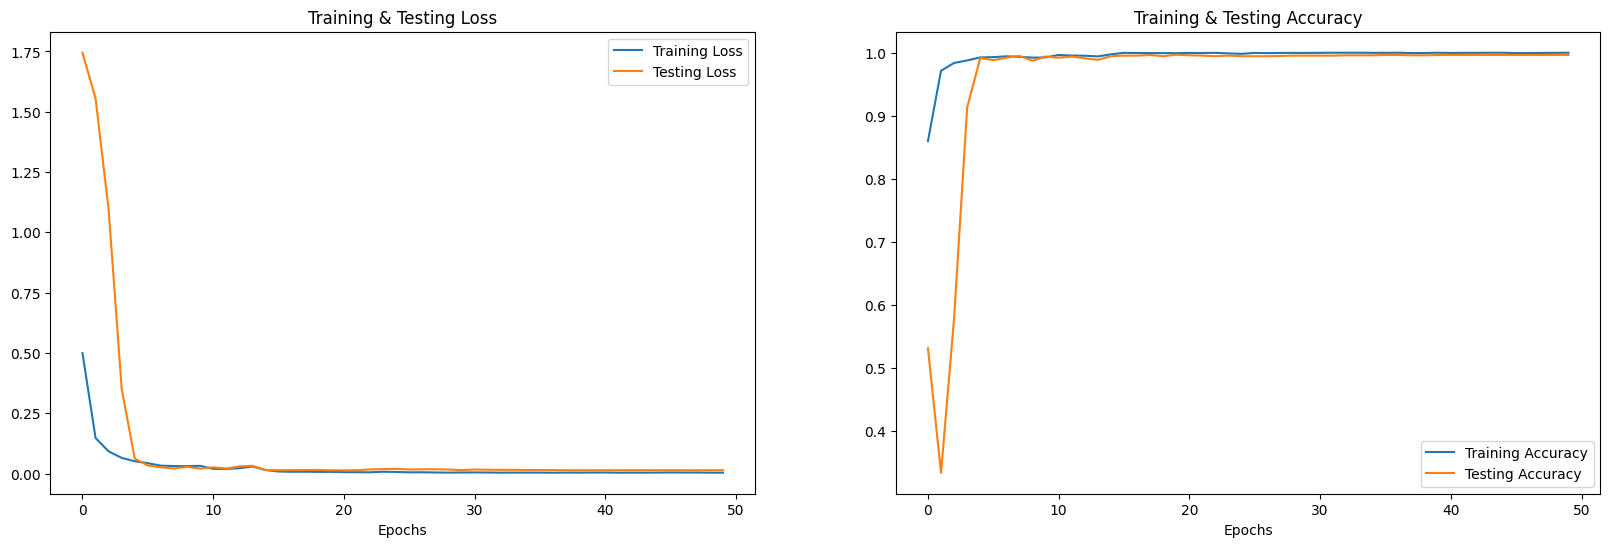

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


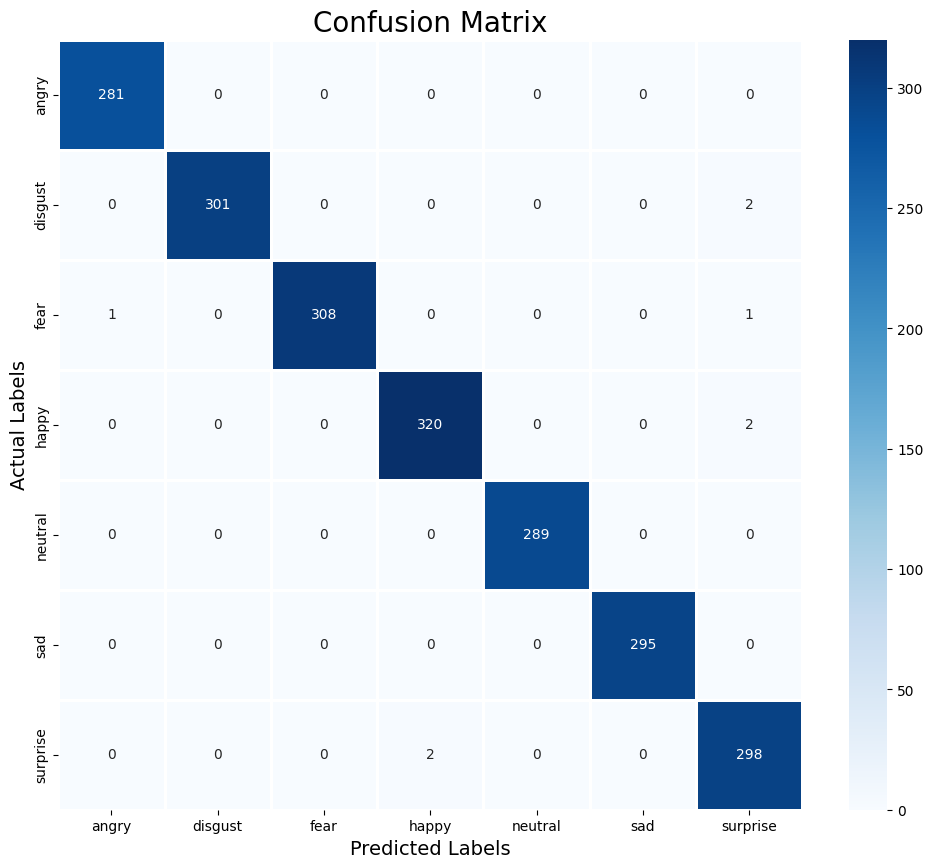

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       281
     disgust       1.00      0.99      1.00       303
        fear       1.00      0.99      1.00       310
       happy       0.99      0.99      0.99       322
     neutral       1.00      1.00      1.00       289
         sad       1.00      1.00      1.00       295
    surprise       0.98      0.99      0.99       300

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100



In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()



# predicting on test data.
pred_test1 = model.predict(x_test)
y_pred1 = encoder.inverse_transform(pred_test1)

y_test1 = encoder.inverse_transform(y_test)



df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred1.flatten()
df['Actual Labels'] = y_test1.flatten()
df.head(10)


cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()



print(classification_report(y_test1, y_pred1))

BatchNormalization, Strided Convolution instead of MaxPooling, Attention Mechanism (Squeeze and Excitation), Learning Rate = 0.0009

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling1D, Multiply, Reshape, Input, Activation
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.models import Model
from keras.optimizers import Adam

def squeeze_excite_block(input_tensor, ratio=16):
    """ Squeeze and Excitation block for 1D Convolution """
    filters = input_tensor.shape[-1]
    se = GlobalAveragePooling1D()(input_tensor)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1, filters))(se)
    x = Multiply()([input_tensor, se])
    return x

# Input Layer
inputs = Input(shape=(x_train.shape[1], 1))

# Conv Block 1
x = Conv1D(256, kernel_size=5, strides=2, padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Conv Block 2
x = Conv1D(256, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Conv Block 3
x = Conv1D(128, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)
x = Dropout(0.2)(x)

# Conv Block 4
x = Conv1D(64, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Dense Layers
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

# Output
outputs = Dense(units=Y1.shape[1], activation='softmax')(x)

# Model
model = Model(inputs=inputs, outputs=outputs)

# Compile
optimizer = Adam(learning_rate=0.0009)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=1e-7)
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

# Evaluate
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 162, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_16 (Conv1D)  │ (None, 81, 256)   │      1,536 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 81, 256)   │      1,024 │ conv1d_16[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 16)        │      4,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 256)       │      4,352 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_4 (Reshape) │ (None, 1, 256)    │          0 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_4          │ (None, 81, 256)   │          0 │ batch_normalizat… │
│ (Multiply)          │                   │            │ reshape_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_17 (Conv1D)  │ (None, 41, 256)   │    327,936 │ multiply_4[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 41, 256)   │      1,024 │ conv1d_17[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 16)        │      4,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 256)       │      4,352 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_5 (Reshape) │ (None, 1, 256)    │          0 │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_5          │ (None, 41, 256)   │          0 │ batch_normalizat… │
│ (Multiply)          │                   │            │ reshape_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_18 (Conv1D)  │ (None, 21, 128)   │    163,968 │ multiply_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 128)   │        512 │ conv1d_18[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 8)         │      1,032 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 128)       │      1,152 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 579,891 (2.21 MB)

 Trainable params: 578,419 (2.21 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.7378 - loss: 0.8564 - val_accuracy: 0.1690 - val_loss: 1.8440 - learning_rate: 9.0000e-04
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9689 - loss: 0.1694 - val_accuracy: 0.4095 - val_loss: 1.4938 - learning_rate: 9.0000e-04
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9854 - loss: 0.1011 - val_accuracy: 0.8400 - val_loss: 0.8474 - learning_rate: 9.0000e-04
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9869 - loss: 0.0718 - val_accuracy: 0.9838 - val_loss: 0.2027 - learning_rate: 9.0000e-04
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9944 - loss: 0.0468 - val_accuracy: 0.9905 - val_loss: 0.0548 - learning_rate: 9.0000e-04
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9921 - loss: 0.0418 - val_accuracy: 0.9933 - val_loss: 0.0256 - learning_rate: 9.0000e-04
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9960 - lo

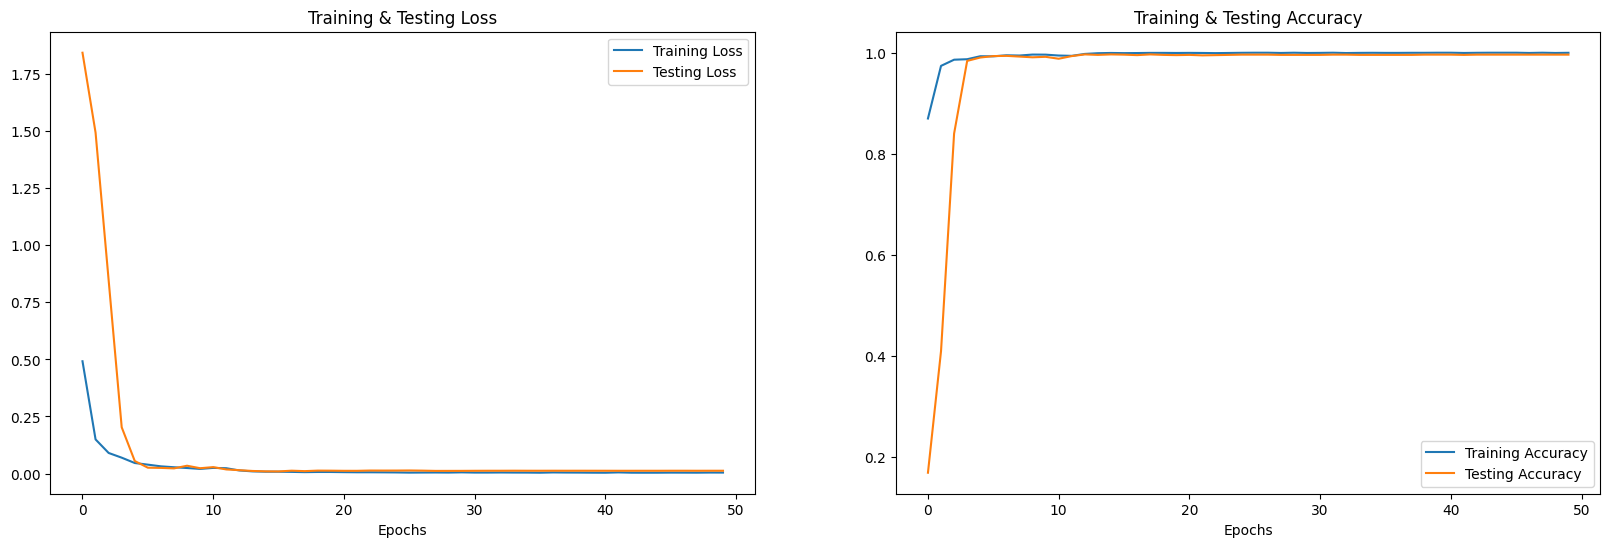

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


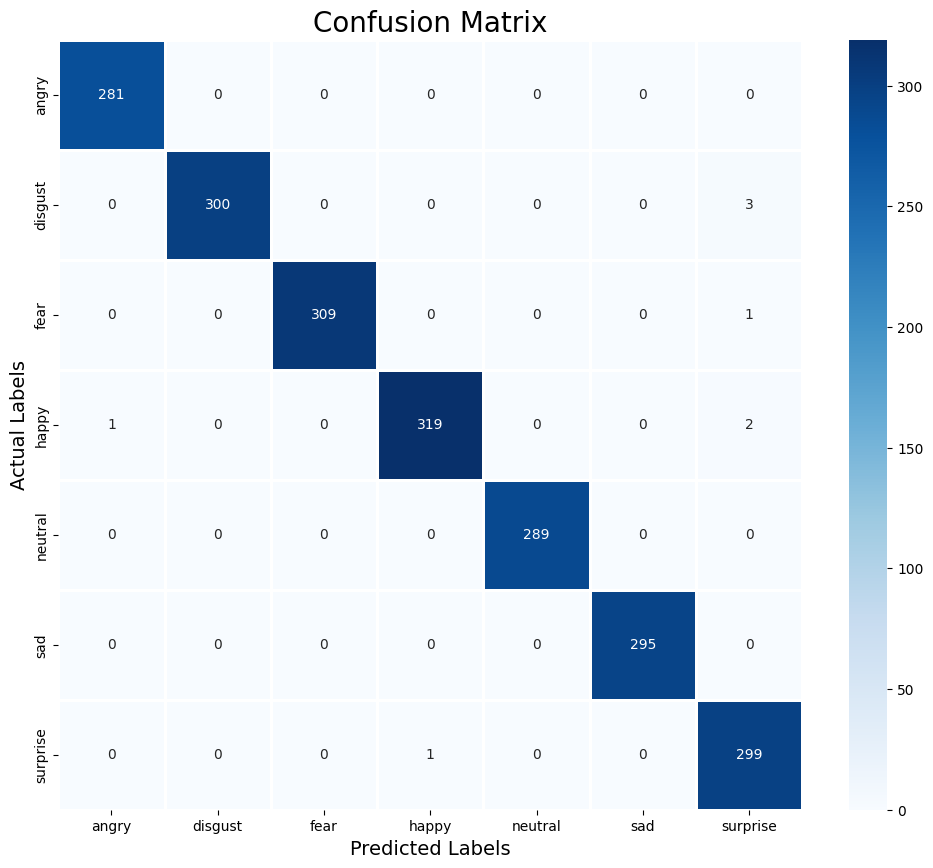

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       281
     disgust       1.00      0.99      1.00       303
        fear       1.00      1.00      1.00       310
       happy       1.00      0.99      0.99       322
     neutral       1.00      1.00      1.00       289
         sad       1.00      1.00      1.00       295
    surprise       0.98      1.00      0.99       300

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100



In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()



# predicting on test data.
pred_test1 = model.predict(x_test)
y_pred1 = encoder.inverse_transform(pred_test1)

y_test1 = encoder.inverse_transform(y_test)



df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred1.flatten()
df['Actual Labels'] = y_test1.flatten()
df.head(10)


cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()



print(classification_report(y_test1, y_pred1))

BatchNormalization, Strided Convolution instead of MaxPooling, Attention Mechanism (Squeeze and Excitation), Learning Rate = 0.0009, Activation = LeakyRelu

In [ ]:
from keras.models import Model
from keras.layers import Conv1D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling1D, Multiply, Reshape, Input
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.optimizers import Adam

def squeeze_excite_block(input_tensor, ratio=16):
    """ Squeeze and Excitation block for 1D Convolution """
    filters = input_tensor.shape[-1]
    se = GlobalAveragePooling1D()(input_tensor)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1, filters))(se)
    x = Multiply()([input_tensor, se])
    return x

# Input Layer
inputs = Input(shape=(x_train.shape[1], 1))

# Conv Block 1
x = Conv1D(256, kernel_size=5, strides=2, padding='same', activation='leaky_relu')(inputs)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Conv Block 2
x = Conv1D(256, kernel_size=5, strides=2, padding='same', activation='leaky_relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Conv Block 3
x = Conv1D(128, kernel_size=5, strides=2, padding='same', activation='leaky_relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)
x = Dropout(0.3)(x)

# Conv Block 4
x = Conv1D(64, kernel_size=5, strides=2, padding='same', activation='leaky_relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Dense Layers
x = Flatten()(x)
x = Dense(32, activation='leaky_relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

# Output
outputs = Dense(units=Y1.shape[1], activation='softmax')(x)

# Model
model = Model(inputs=inputs, outputs=outputs)

# Compile with label smoothing
optimizer = Adam(learning_rate=0.0009)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),  # Added label smoothing
    metrics=['accuracy']
)

# Model Summary
model.summary()

# Train the model
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=1e-7)
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[rlrp]
)

# Evaluate the model
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 162, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_20 (Conv1D)  │ (None, 81, 256)   │      1,536 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 81, 256)   │      1,024 │ conv1d_20[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 16)        │      4,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 256)       │      4,352 │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_8 (Reshape) │ (None, 1, 256)    │          0 │ dense_27[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_8          │ (None, 81, 256)   │          0 │ batch_normalizat… │
│ (Multiply)          │                   │            │ reshape_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_21 (Conv1D)  │ (None, 41, 256)   │    327,936 │ multiply_8[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 41, 256)   │      1,024 │ conv1d_21[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 16)        │      4,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 256)       │      4,352 │ dense_28[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_9 (Reshape) │ (None, 1, 256)    │          0 │ dense_29[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_9          │ (None, 41, 256)   │          0 │ batch_normalizat… │
│ (Multiply)          │                   │            │ reshape_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_22 (Conv1D)  │ (None, 21, 128)   │    163,968 │ multiply_9[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 128)   │        512 │ conv1d_22[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 8)         │      1,032 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 128)       │      1,152 │ dense_30[0][0]    │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 579,891 (2.21 MB)

 Trainable params: 578,419 (2.21 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.7368 - loss: 1.1056 - val_accuracy: 0.6290 - val_loss: 1.7228 - learning_rate: 9.0000e-04
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9650 - loss: 0.6215 - val_accuracy: 0.7410 - val_loss: 1.3807 - learning_rate: 9.0000e-04
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9796 - loss: 0.5877 - val_accuracy: 0.9300 - val_loss: 0.9158 - learning_rate: 9.0000e-04
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9859 - loss: 0.5647 - val_accuracy: 0.9714 - val_loss: 0.6502 - learning_rate: 9.0000e-04
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9859 - loss: 0.5586 - val_accuracy: 0.9919 - val_loss: 0.5293 - learning_rate: 9.0000e-04
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9939 - loss: 0.5418 - val_accuracy: 0.9943 - val_loss: 0.4948 - learning_rate: 9.0000e-04
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9935 - l

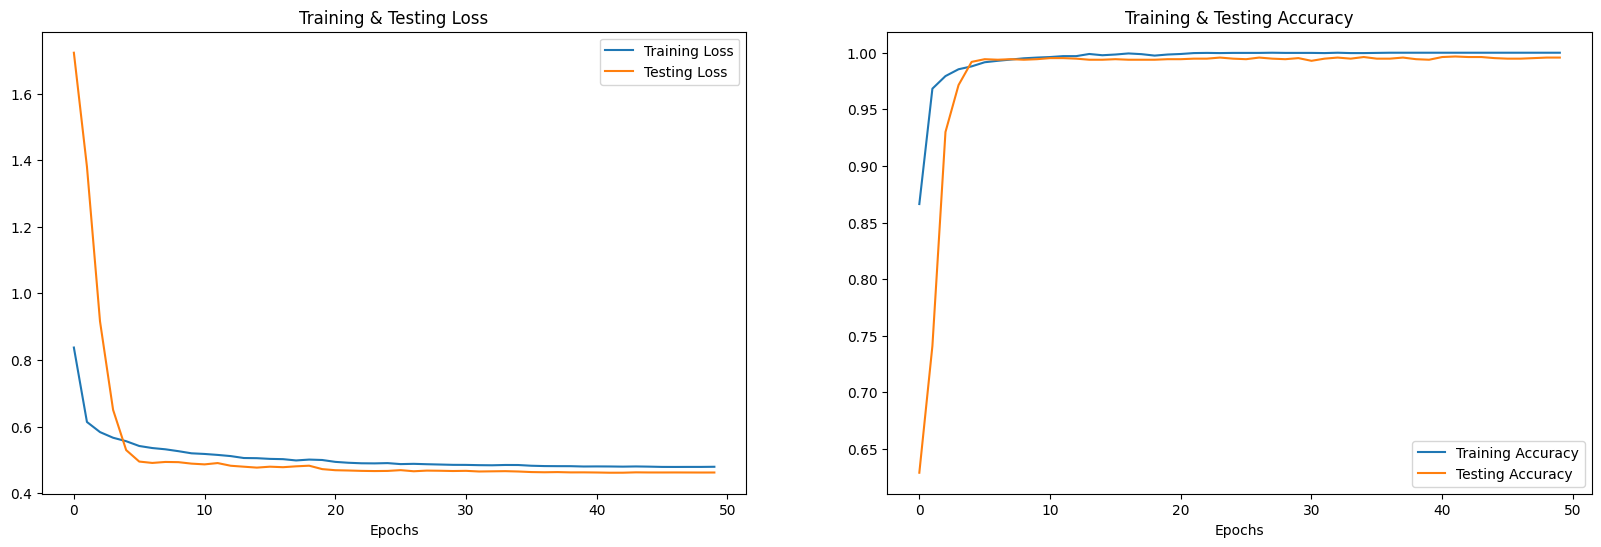

66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


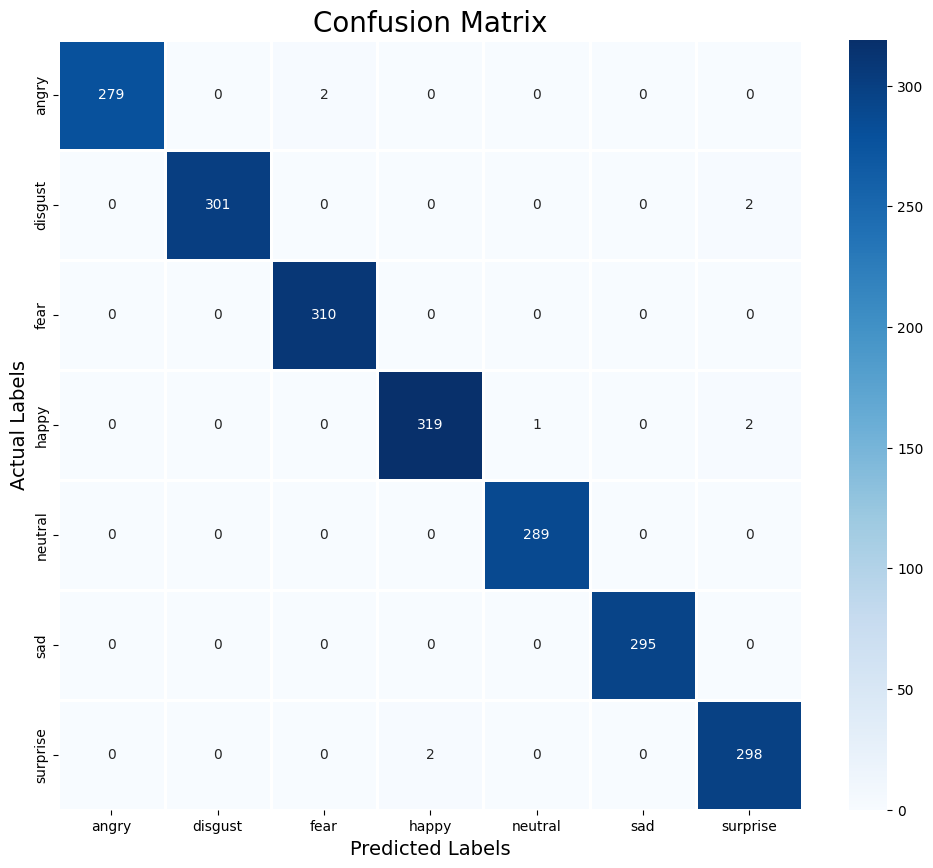

              precision    recall  f1-score   support

       angry       1.00      0.99      1.00       281
     disgust       1.00      0.99      1.00       303
        fear       0.99      1.00      1.00       310
       happy       0.99      0.99      0.99       322
     neutral       1.00      1.00      1.00       289
         sad       1.00      1.00      1.00       295
    surprise       0.99      0.99      0.99       300

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100



In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()



# predicting on test data.
pred_test1 = model.predict(x_test)
y_pred1 = encoder.inverse_transform(pred_test1)

y_test1 = encoder.inverse_transform(y_test)



df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred1.flatten()
df['Actual Labels'] = y_test1.flatten()
df.head(10)


cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()



print(classification_report(y_test1, y_pred1))